In [1]:
import arxiv
import matplotlib.pyplot as plt
import math  
from matplotlib.ticker import MaxNLocator

In [13]:
keywords = ["Adagrad",
              "RMSProp",
              "Adadelta",
              "Adam",
              "AdaMax",
              "Nadam",
              "Gadam",
              "AdaBound",
              "AdamW",
              "AMSGrad",
              "AMGSGrad",
              "ND-Adam",
              "RAdam",
              "K-FAC"
             ]

In [14]:
def print_timeline(timeline, keyword):
    lists = sorted(timeline.items())
    x, y = zip(*lists)
    x_values = []
    y_values = []
    for x_tic in x:
        x_values.append(int(x_tic))
    for y_tic in y:
        y_values.append(int(y_tic))
        
    fig, ax = plt.subplots()
    ax.set_xticks(x_values)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticklabels(x_values, rotation='vertical')
    ax.bar(x_values, y)
    plt.ylabel('Number of Publications')
    plt.show()
    fig.savefig(keyword + "_hist.pdf", bbox_inches = 'tight')
    
def print_timelines(timelines):
    pass

def organizie_timeline(results, startDate, toDate):
    timeline = {}
    for year in range(startDate, toDate + 1):
        timeline[year] = 0
    
    for paper in results:
        year = int(paper["published"][:4])
        if year >= startDate and year <= toDate:
            timeline[year] = timeline[year] + 1
    
    print("Timeline:", timeline)
    return timeline


def send_query(search_key):
    count = 0
    timeline = {}
    results = []
    while True:
        result = arxiv.query(query="abs:" + search_key + " OR ti:" + search_key, sort_by= "submittedDate", sort_order="ascending", max_results=100, start=count, prune=False)
        
        if len(result) == 0:
            print("\n" + "#############################")
            print("Final number of results for query (" + search_key + "):", count)
            timeline = organizie_timeline(results, startDate=2000, toDate=2019)
            print_timeline(timeline, search_key)
            print("#############################" + "\n")
            return timeline
        
        results.extend(result)
        count += len(result)
        print("Currently the query for " + search_key + " is at:", count)

Currently the query for Adagrad is at: 53

#############################
Final number of results for query (Adagrad): 53
Timeline: {2000: 0, 2001: 0, 2002: 0, 2003: 0, 2004: 0, 2005: 0, 2006: 0, 2007: 0, 2008: 0, 2009: 0, 2010: 0, 2011: 0, 2012: 0, 2013: 2, 2014: 1, 2015: 5, 2016: 3, 2017: 9, 2018: 16, 2019: 17}


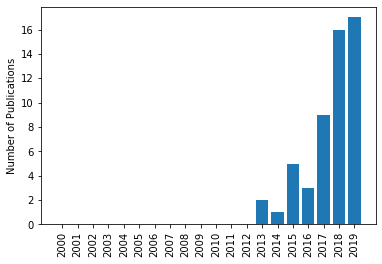

#############################



KeyboardInterrupt: 

In [15]:
timelines = []
for algorithm in keywords:
    timeline = send_query(algorithm)
    timelines.append(timeline)

print_timelines(timelines)